🎈🎈**Data Mining Fianl Project 2021 Summer**

👱‍♂️Aleksander Wojnarowicz(AW77438) 

👱‍♀️Yuqing Liu(YL110057)

📚algorithm
* LogisticRegression
* Descision tree
* Bagging

📈Dataset
https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

# Introduction



## Motivation
In the past few years, people have used intuition to distinguish fake job postings. For example, unusually high salaries may suggest false job postings. Nowadays, big data technology allows us to process these usage models to release job data more reliably and identify fake data. The goal of our project is to train a classifier to identify fake or real job postings using functions such as salary range, benefits, Required_experience, Required_education, etc.

## Dataset Description
This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

## Description of Task
Our task is to bulid some models to predict whether the job is fake or not.

## Descripe Target Variables
* fraudulent - the job is fake or not? (binary: 'yes', 'no')

## Features Explanation
### Variables
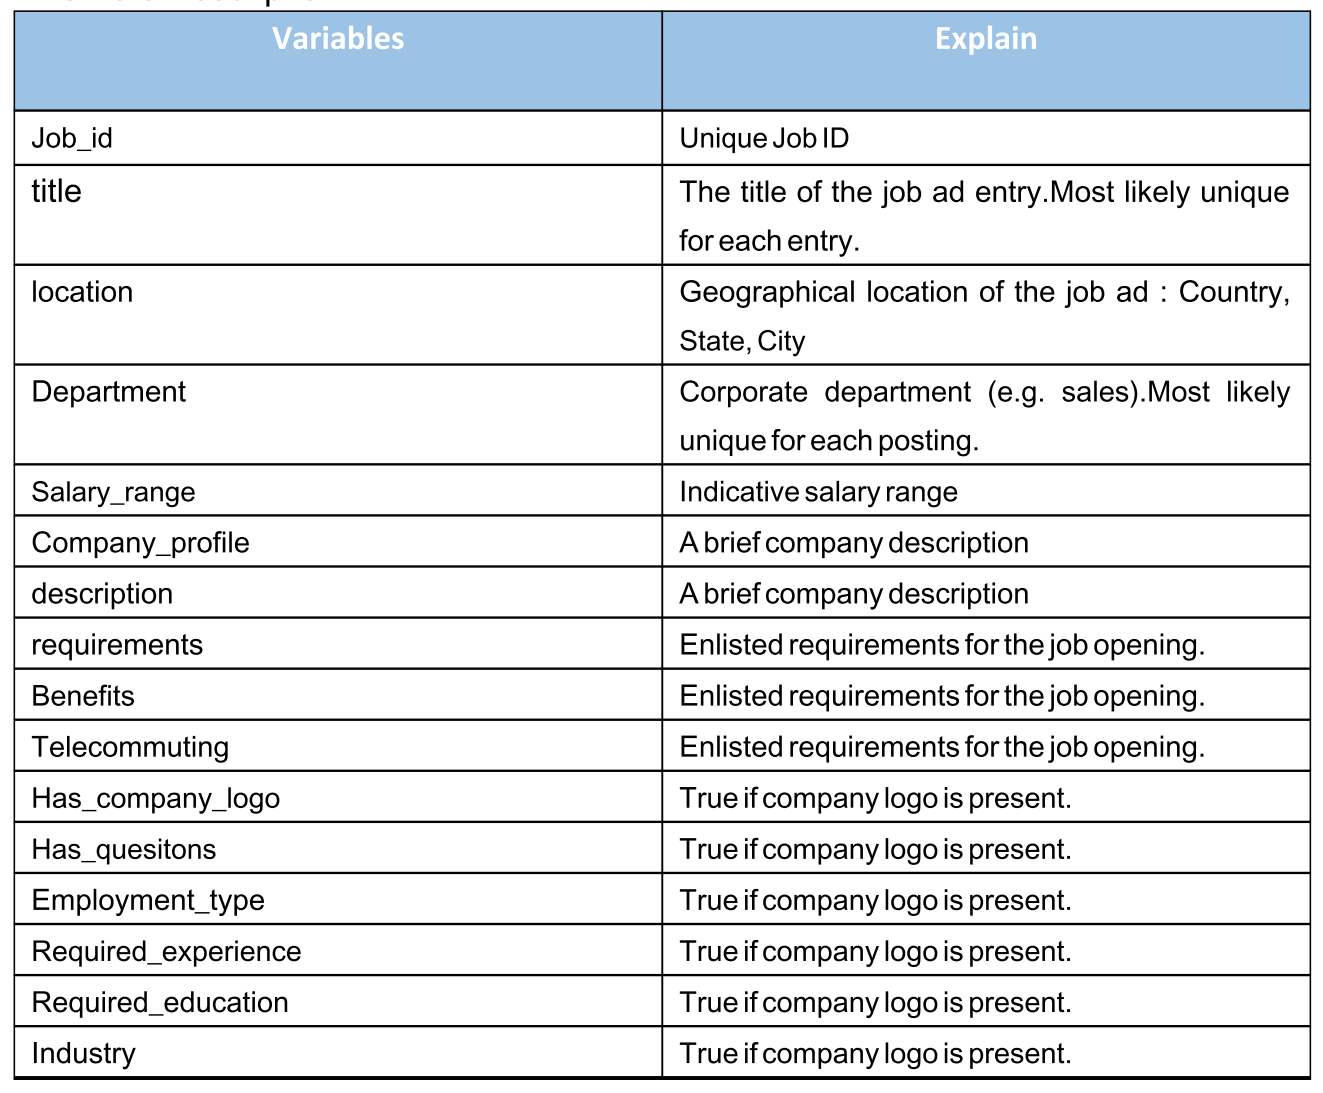

### Output variable (desired target):
* fraudulent - the job is fake or not? {binary| 'yes':1 , 'no':0}

In [1]:
# import the dataset
import numpy as np 
import pandas as pd
df = pd.read_csv('fake_job_postings.csv',low_memory=False)
df.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,located in Houston,is actively seeking an experienced Commission...,environmental,"and safety regulations.""",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI �?Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48',
       'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52',
       'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17837 entries, 0 to 17836
Data columns (total 57 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   job_id               17837 non-null  int64  
 1   title                17837 non-null  object 
 2   location             17493 non-null  object 
 3   department           6321 non-null   object 
 4   salary_range         2866 non-null   object 
 5   company_profile      14536 non-null  object 
 6   description          17836 non-null  object 
 7   requirements         15172 non-null  object 
 8   benefits             10824 non-null  object 
 9   telecommuting        17827 non-null  object 
 10  has_company_logo     17821 non-null  object 
 11  has_questions        17800 non-null  object 
 12  employment_type      14406 non-null  object 
 13  required_experience  10899 non-null  object 
 14  required_education   9898 non-null   object 
 15  industry             12977 non-null 

#  Cleaning and Preprocessing Data
* Removing or imputing missing Data
* Handing Outliers
* Standardrizaton
* One-hot encoding
* Merging Categories

## Removing Missing

In [4]:
# Delete unnamed col
df=df.iloc[:,0:18]

In [5]:
# Delete 'telecommuting、has_company_logo、has_questions、fraudulent' not 1 or 0
df=df[(df.telecommuting=='1')|(df.telecommuting=='0')]
df=df[(df.has_company_logo=='1')|(df.has_company_logo=='0')]
df=df[(df.has_questions=='1')|(df.has_questions=='0')]
df=df[(df.fraudulent=='1')|(df.fraudulent=='0')]

In [6]:
# Unblanced Dataset
df['fraudulent'].value_counts()

0    16700
1      863
Name: fraudulent, dtype: int64

In [7]:
df= df.drop(['job_id','title','location','department','industry','function'], axis=1)

In [8]:
df.nunique()

salary_range             867
company_profile         1703
description            14527
requirements           11713
benefits                6111
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
fraudulent                 2
dtype: int64

In [9]:
df.head()

,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,0
1,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,0
3,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI �?Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
5,NaN,NaN,Job OverviewApex is an environmental consultin...,NaN,NaN,0,0,0,NaN,NaN,NaN,0


## imputing Missing

In [13]:
cat_columns = ['employment_type', 'required_experience', 'required_education']

for col in cat_columns:
    df[col].fillna("Unknown", inplace=True) # imputing with Unkonwn

In [11]:
text_columns = ['company_profile', 'description', 'requirements', 'benefits']

df = df.dropna(subset=text_columns, how='all') 
for col in text_columns:
    df[col].fillna(' ', inplace=True) # imputing with blank

In [12]:
df.head()

,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,fraudulent
0,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,0
1,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,0
3,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI �?Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,0
4,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,0
5,NaN,,Job OverviewApex is an environmental consultin...,,,0,0,0,Unknown,Unknown,Unknown,0


## Handling special variable

In [14]:
unique_salary = df['salary_range'].unique()
print(unique_salary[0:5])

[nan '20000-28000' '100000-120000' '120000-150000' '50000-65000']


In [15]:
new = df['salary_range'].str.split("-", n = 1, expand = True) 

df['salary_range_min']= new[0]
df['salary_range_max']= new[1]

df['salary_range_min'].fillna('-1', inplace=True)
df['salary_range_max'].fillna('-1', inplace=True)

def remove_string(x):
    if not x.isnumeric(): 
        val = '-1'
    else:
        val = x
    return val

df['salary_range_min'] = df['salary_range_min'].apply(lambda x: remove_string(x))
df['salary_range_max'] = df['salary_range_max'].apply(lambda x: remove_string(x))
df.drop('salary_range', axis=1, inplace = True)

In [17]:
fraudulent=df.pop('fraudulent')
df.insert(12,'fraudulent',fraudulent)
df

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,salary_range_min,salary_range_max,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,-1,-1,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,-1,-1,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI �?Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,-1,-1,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,-1,-1,0
5,,Job OverviewApex is an environmental consultin...,,,0,0,0,Unknown,Unknown,Unknown,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17832,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,Unknown,-1,-1,0
17833,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,-1,-1,0
17834,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,Full-time,Unknown,Unknown,-1,-1,0
17835,,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,-1,-1,0


**Convert numeric variable format from str to numeric**

In [18]:
df.fraudulent=pd.to_numeric(df.fraudulent)
df.telecommuting=pd.to_numeric(df.telecommuting)
df.has_company_logo=pd.to_numeric(df.has_company_logo)
df.has_questions=pd.to_numeric(df.has_questions)
df.salary_range_min=pd.to_numeric(df.salary_range_min)
df.salary_range_max=pd.to_numeric(df.salary_range_max)

In [19]:
df.head()

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,salary_range_min,salary_range_max,fraudulent
0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,Unknown,-1,-1,0
1,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Unknown,-1,-1,0
3,Our passion for improving quality of life thro...,THE COMPANY: ESRI �?Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,-1,-1,0
4,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,-1,-1,0
5,,Job OverviewApex is an environmental consultin...,,,0,0,0,Unknown,Unknown,Unknown,-1,-1,0


# EDA

## Education Related Variables

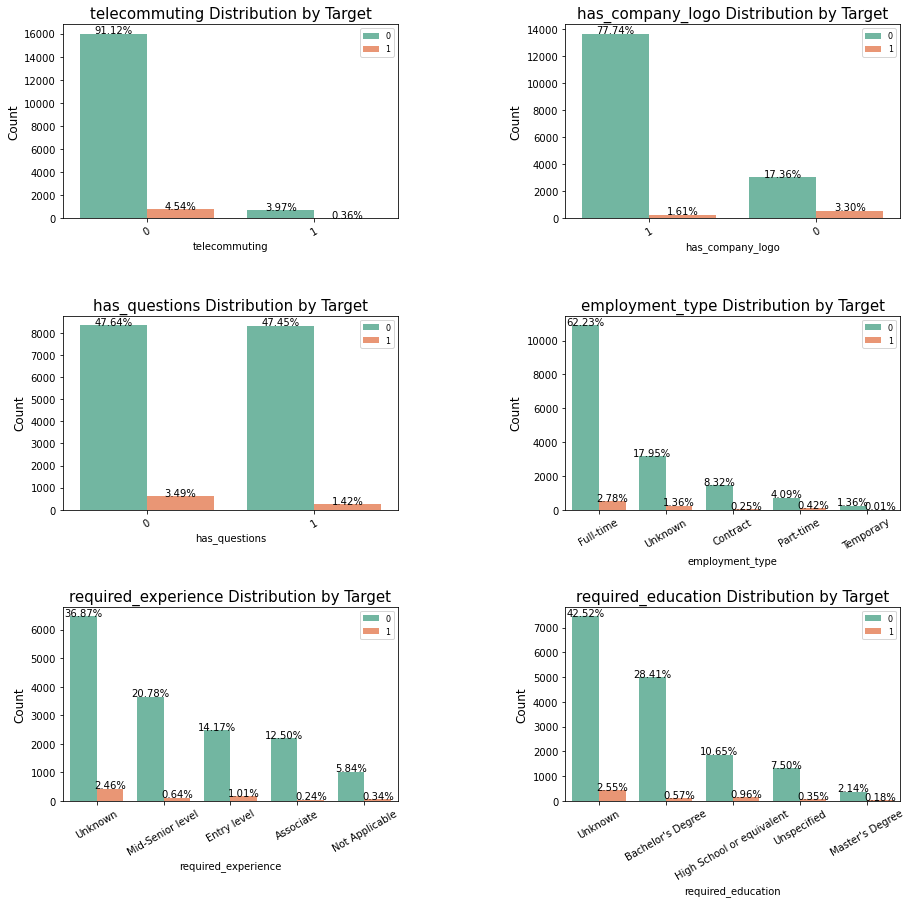

In [22]:
cat_eda_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education']

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec 

grid = gridspec.GridSpec(5, 2, wspace=0.5, hspace=0.5) 
plt.figure(figsize=(15,25)) 

for n, col in enumerate(df[cat_eda_columns]): 
    ax = plt.subplot(grid[n]) 
    sns.countplot(x=col, data=df, hue='fraudulent', palette='Set2', order=df[col].value_counts().iloc[:5].index) 
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'{col} Distribution by Target', fontsize=15) 
    xlabels = ax.get_xticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=30) 
    total = len(df)
    sizes=[] 
    for p in ax.patches: 
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=10) 
    
plt.show()

#### Real Posts
* ✅Telecommuting 
* ✅Company Logo 
* ✅Employment Type
* ✅Required Experience and Education

#### Fradulent Posts
* ❌Telecommuting 
* ❌Company Logo 
* ✅Employment Type
* ✅Required Experience and Education 


## Text information variables

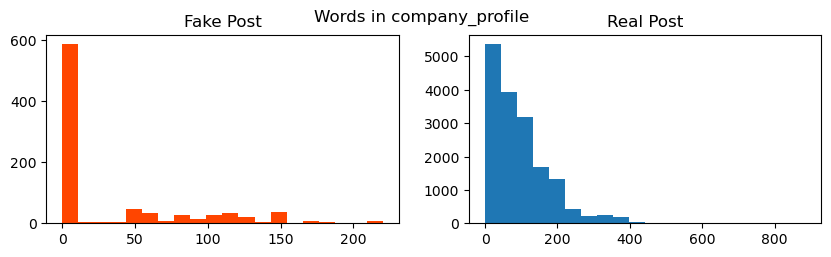

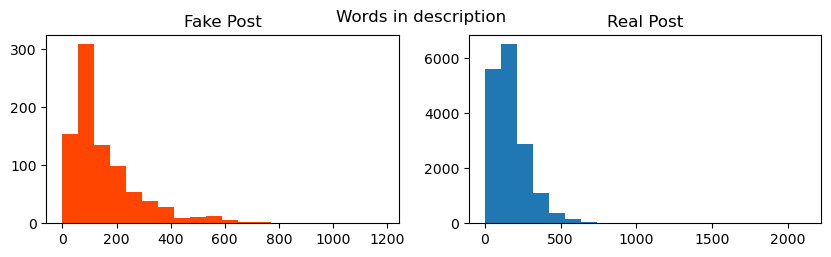

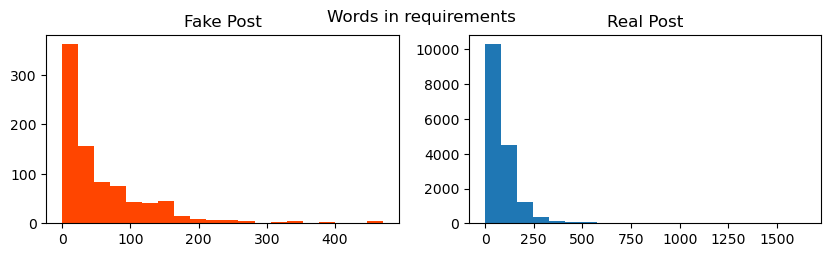

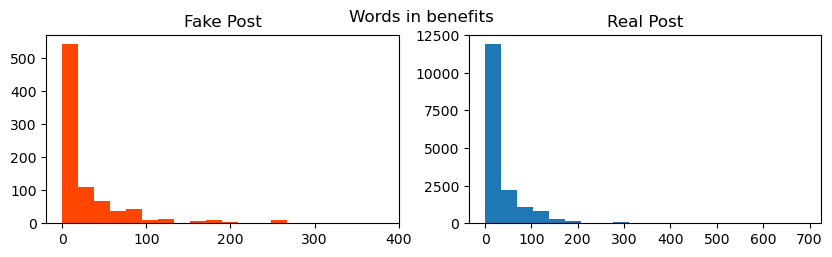

In [24]:
text_cols = ['company_profile', 'description', 'requirements', 'benefits']

for col in text_cols:
    fig,(ax1,ax2)= plt.subplots(ncols=2, figsize=(10, 2.5), dpi=100)
    num=df[df["fraudulent"]==1][col].str.split().map(lambda x: len(x))
    ax1.hist(num,bins = 20,color='orangered')
    ax1.set_title('Fake Post')
    num=df[df["fraudulent"]==0][col].str.split().map(lambda x: len(x))
    ax2.hist(num, bins = 20)
    ax2.set_title('Real Post')
    fig.suptitle(f'Words in {col}')
    plt.show()

### Real Posts 
* ✅

### Fradulent Posts
* ✅

# Data Processing

## Key-value`

In [20]:
# Descriptive related variables converted to length
df.company_profile=df.company_profile.str.len()
df.description=df.description.str.len()
df.requirements=df.requirements.str.len()
df.benefits=df.benefits.str.len()

In [21]:
df.required_education.value_counts()

Unknown                              7915
Bachelor's Degree                    5090
High School or equivalent            2039
Unspecified                          1379
Master's Degree                       406
Associate Degree                      271
Certification                         170
Some College Coursework Completed     101
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [22]:
edu_mapping={'Unknown':0,'Unspecified':0,'Some High School Coursework':1,
             'High School or equivalent':2,'Vocational':3,'Vocational - HS Diploma':3,
             'Vocational - Degree':3,'Certification':4,'Associate Degree':5,
             'Some College Coursework Completed':6,"Bachelor's Degree":7,
             'Professional':8,"Master's Degree":9,'Doctorate':10}
df.required_education=df.required_education.map(edu_mapping)
df.required_experience.value_counts()

Unknown             6907
Mid-Senior level    3763
Entry level         2666
Associate           2237
Not Applicable      1086
Director             385
Internship           379
Executive            139
Name: required_experience, dtype: int64

In [23]:
exp_mapping={'Unknown':0,'Not Applicable':0,'Entry level':1,'Internship':2,'Associate':3,'Mid-Senior level':4,'Director':5,'Executive':5}
df.required_experience=df.required_experience.map(exp_mapping)
df.employment_type.value_counts()

Full-time    11416
Unknown       3392
Contract      1505
Part-time      792
Temporary      240
Other          217
Name: employment_type, dtype: int64

## One hot encode

In [26]:
# one hot encode
df2=pd.get_dummies(df,drop_first=True,dtype=int)
df2

,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,required_experience,required_education,salary_range_min,salary_range_max,fraudulent,employment_type_Full-time,employment_type_Other,employment_type_Part-time,employment_type_Temporary,employment_type_Unknown
0,885,905,852,1,0,1,0,2,0,-1,-1,0,0,1,0,0,0
1,1286,2077,1433,1292,0,1,0,0,0,-1,-1,0,1,0,0,0,0
3,614,2600,1429,782,0,1,0,4,7,-1,-1,0,1,0,0,0,0
4,1628,1520,757,21,0,1,1,4,7,-1,-1,0,1,0,0,0,0
5,1,3418,1,1,0,0,0,0,0,-1,-1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17832,1708,1442,1273,857,0,1,1,4,0,-1,-1,0,1,0,0,0,0
17833,2270,1216,721,511,0,1,1,4,7,-1,-1,0,1,0,0,0,0
17834,228,1291,1235,1,0,0,0,0,0,-1,-1,0,1,0,0,0,0
17835,1,506,502,216,0,0,1,0,8,-1,-1,0,0,0,0,0,0


## PCA

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

pca = PCA()

stdsc = StandardScaler()
X0=df2.values
X,y=X0[:,:-1],X0[:,-1]



X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([1.43263171e-01, 1.24966248e-01, 9.53811166e-02, 7.05639547e-02,
       6.84802809e-02, 6.43330670e-02, 6.20926460e-02, 6.15569770e-02,
       5.82820583e-02, 5.53147913e-02, 5.18239188e-02, 4.90649167e-02,
       3.81719698e-02, 2.99793222e-02, 2.67134354e-02, 1.21259188e-05])

In [28]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

## StandardScale

In [29]:
from sklearn.preprocessing import StandardScaler  

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Dealing with data imbalance by upsampling

In [30]:
X0=df2.values
X,y=X0[:,:-1],X0[:,-1]

In [31]:
X_imb = np.vstack((X[y == 0], X[y == 1]))
y_imb = np.hstack((y[y == 0], y[y == 1]))
y_imb

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [32]:
from sklearn.utils import resample

print('Number of class 1 samples before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)

print('Number of class 1 samples after:', X_upsampled.shape[0])

Number of class 1 samples before: 3392
Number of class 1 samples after: 14170


In [33]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [34]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100

50.0

## Clone

In [35]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

## Feature Selection

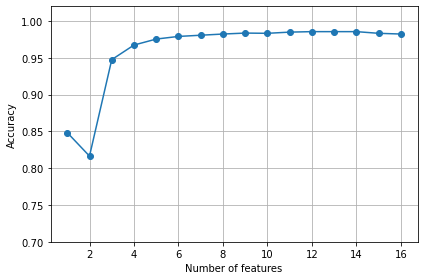

In [36]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('images/04_08.png', dpi=300)
plt.show()

#### Pick 6 X features.

In [37]:
k6 = list(sbs.subsets_[10])
print(df2.columns[1:][k6])

Index(['required_education', 'salary_range_min', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'employment_type_Unknown'],
      dtype='object')


In [38]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

knn.fit(X_train_std[:, k6], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k6], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k6], y_test))

Training accuracy: 0.9842186610266005
Test accuracy: 0.9777946479407857
Training accuracy: 0.9789310989994305
Test accuracy: 0.9772252799392674


#### Now we get the same selected 6 features here. Even the order between the first and second feature switches now, it doesn't make real difference in the following process.

In [39]:
X_bal

array([[ 885,  905,  852, ...,    1,    0,    0],
       [1286, 2077, 1433, ...,    0,    0,    0],
       [ 614, 2600, 1429, ...,    0,    0,    0],
       ...,
       [ 838,  246,    1, ...,    0,    0,    0],
       [   1, 1844,  913, ...,    0,    0,    0],
       [   1,  852,  256, ...,    0,    0,    0]], dtype=int64)

In [40]:
df3=df2[['description', 'required_education', 'employment_type_Other',
       'employment_type_Part-time', 'employment_type_Temporary',
       'employment_type_Unknown','fraudulent']]
X0=df3.values
X,y=X0[:,:-1],X0[:,-1]
X_imb = np.vstack((X[y == 0], X[y == 1]))
y_imb = np.hstack((y[y == 0], y[y == 1]))
from sklearn.utils import resample

print('Number of class 1 samples before:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))
y_pred = np.zeros(y_bal.shape[0])
print(np.mean(y_pred == y_bal) * 100)

Number of class 1 samples before: 862
50.0


## Devided into train and test dataset

In [41]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test =\
    train_test_split(X_bal, y_bal, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y_bal)

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

# Bulid the model

## PCA_LR

0.6604682733379353
{'logisticregression__C': 0.001}
[[1737 3273]
 [1032 3978]]


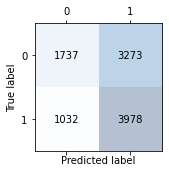

Precision: 0.627
Recall: 0.347
F1: 0.447


In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer


scorer = make_scorer(precision_score, pos_label=0)

pipe_lr = make_pipeline(StandardScaler(),
                         LogisticRegression(penalty='l1',solver='liblinear'))

param_range = [0.001, 0.01, 0.1, 1.0, 10.0]

param_grid = [{'logisticregression__C': param_range}]

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring=scorer,
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

## PCA_ Decision Tree

0.8935024971564867
{'decisiontreeclassifier__max_depth': 15}
[[4293  717]
 [ 453 4557]]


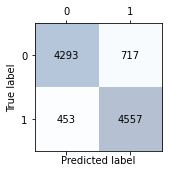

Precision: 0.905
Recall: 0.857
F1: 0.880


In [43]:
from sklearn.tree import DecisionTreeClassifier
pipe_tree = make_pipeline(StandardScaler(),
                         DecisionTreeClassifier(criterion='gini'))

param_range = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

param_grid = [{'decisiontreeclassifier__max_depth': param_range}]

gs = GridSearchCV(estimator=pipe_tree, 
                  param_grid=param_grid, 
                  scoring=scorer, 
                  cv=10)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
from sklearn.metrics import confusion_matrix

gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))

## Bagging

[[4632  378]
 [   0 5010]]


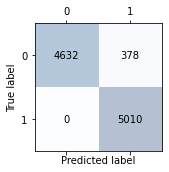

Precision: 1.000
Recall: 0.925
F1: 0.961


In [44]:
from sklearn.ensemble import BaggingClassifier

def Bagging_func(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):

    tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=None,
                                  random_state=1)

    bag = BaggingClassifier(base_estimator=tree,
                            n_estimators=500, 
                            max_samples=1.0, 
                            max_features=1.0, 
                            bootstrap=True, 
                            bootstrap_features=False, 
                            n_jobs=1, 
                            random_state=1)

    bag = bag.fit(X_train, y_train)
    y_train_pred = bag.predict(X_train)
    y_test_pred = bag.predict(X_test)

    from sklearn.metrics import confusion_matrix

    y_pred = bag.predict(X_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    print(confmat)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    #plt.savefig('images/06_09.png', dpi=300)
    plt.show()


    print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred, pos_label=0))
    
Bagging_func()

## Sum Model
* LR |  0.447
* DT |  0.879
* BA |  0.961

In [45]:
Result_df=pd.DataFrame({'actual':y_test,
                    'predicted':y_pred})

In [46]:
Result_df

,actual,predicted
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
10015,0,0
10016,0,0
10017,0,1
10018,1,1


## That's all, thank you!😊